In [7]:
from IPython.display import Audio
from scipy.io import wavfile
import numpy as np

## Recording your own live-recordings
> 若手邊沒有音檔可以在 colab 上立即錄音(預設檔名: audio_ds.wav)

Speak to your microphone 5 sec...


<IPython.core.display.Javascript object>

Done!


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


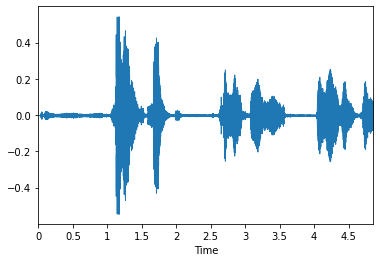

77760

In [33]:
# from https://gist.github.com/korakot/c21c3476c024ad6d56d5f48b0bca92be

from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec, filename='audio.wav'):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec * 1000))
  b = b64decode(s.split(',')[1])
  with open(filename, 'wb+') as f:
    f.write(b)

audio = 'audio.wav'
second = 5
print(f"Speak to your microphone {second} sec...")
record(second, audio)
print("Done!")


import librosa
import librosa.display
speech, rate = librosa.load(audio, sr=16000)
librosa.display.waveplot(speech, sr=rate)

import matplotlib.pyplot as plt
plt.show()

import pysndfile
file_name = './sample.wav'
pysndfile.sndio.write(file_name, speech, rate=rate, format='wav', enc='pcm16')

In [34]:
# Playing the audio file
Audio(file_name)

In [35]:
data = wavfile.read(file_name)
framerate = data[0]
sounddata = data[1]
time = np.arange(0,len(sounddata))/framerate
print('Sample rate:',framerate,'Hz')
print('Total time:',len(sounddata)/framerate,'s')

Sample rate: 16000 Hz
Total time: 4.86 s


# Generating Text from Audio

In [ ]:
!pip install transformers==4.19.1

In [28]:
import soundfile as sf
import librosa
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

In [29]:
# load pretrained model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

Downloading:   0%|          | 0.00/159 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/163 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/360M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
input_audio, _ = librosa.load(file_name, 
                              sr=16000)

In [37]:
input_values = processor(input_audio, return_tensors="pt", sampling_rate=16000).input_values
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)[0]

In [38]:
transcription.lower()

'hallo test can you hear me my na is and'